In [52]:
pip install -U scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


In [53]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import sensor
from skfuzzy import control as ctrl


In [54]:
# establishing fuzzy logic for getting a good range of data
humidity = ctrl.Antecedent(np.arange(0, 100, 1), 'humidity')
temp = ctrl.Antecedent(np.arange(0, 51, 1), 'temp')
turning = ctrl.Consequent(np.arange(0, 11, 1), 'turning')

humidity['too dry'] = fuzz.trapmf(humidity.universe, [0, 0, 41, 51])
humidity['well'] = fuzz.trapmf(humidity.universe, [51, 63, 75, 87])
humidity['too wet'] = fuzz.trapmf(humidity.universe, [87, 95, 100, 100])

temp['too cold'] = fuzz.trapmf(temp.universe, [0, 0, 27, 34])
temp['moderate'] = fuzz.trimf(temp.universe, [34, 38, 41])
temp['too hot'] = fuzz.trapmf(temp.universe, [41, 44, 50, 50])

turning['few'] = fuzz.trimf(turning.universe, [0, 0, 5])
turning['moderate'] = fuzz.trimf(turning.universe, [0, 5, 10])
turning['many'] = fuzz.trimf(turning.universe, [5, 10, 10])


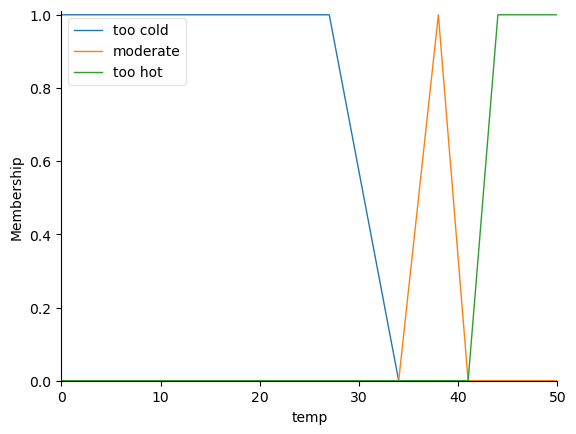

In [55]:
temp.view()

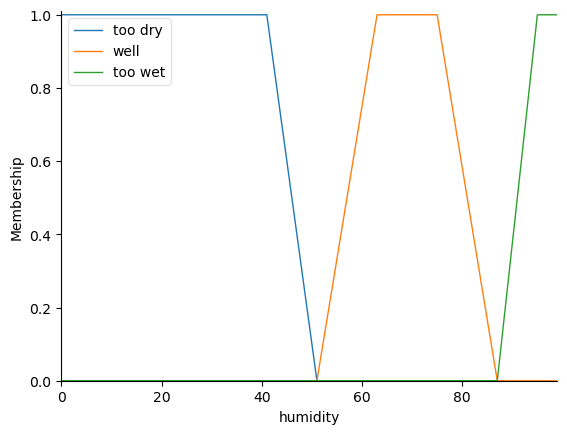

In [56]:
humidity.view()

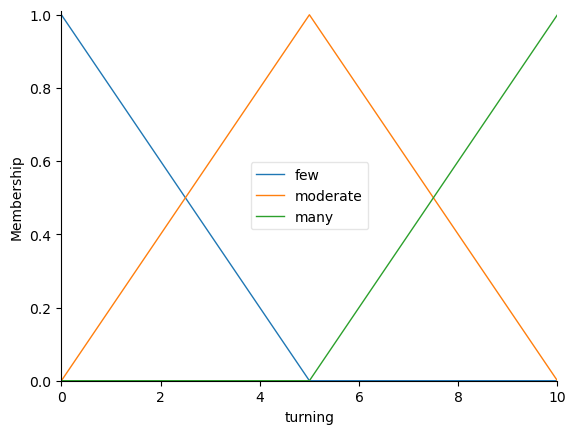

In [57]:
turning.view()

In [58]:
rule1 = ctrl.Rule(temp['too cold'] & humidity['too dry'], turning['many'])
rule2 = ctrl.Rule(temp['too cold'] & humidity['well'], turning['moderate'])
rule3 = ctrl.Rule(temp['too cold'] & humidity['too wet'], turning['few'])
rule4 = ctrl.Rule(temp['moderate'] & humidity['too dry'], turning['many'])
rule5 = ctrl.Rule(temp['moderate'] & humidity['well'], turning['moderate'])
rule6 = ctrl.Rule(temp['moderate'] & humidity['too wet'], turning['few'])
rule7 = ctrl.Rule(temp['too hot'] & humidity['too dry'], turning['few'])
rule8 = ctrl.Rule(temp['too hot'] & humidity['well'], turning['few'])
rule9 = ctrl.Rule(temp['too hot'] & humidity['too wet'], turning['few'])

In [59]:
turning_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [60]:
turning_simulation = ctrl.ControlSystemSimulation(turning_ctrl)

In [61]:

def getTurning(temp, humid):
    
    turning_simulation.input['temp'] = temp
    turning_simulation.input['humidity'] = humid


    turning_simulation.compute()
    print("The number of times the eggs are turning are", int(turning_simulation.output['turning']))

In [69]:
getTurning(float(sensor.gettemp()), float(sensor.gethumid()))

The number of times the eggs are turning are 5
